In [1]:
#importing libraries
from os import path
from keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import seaborn as sns

In [2]:
#pre-processing csv file
def preprocessing(filepath):
    file=pd.read_csv(filepath)
    file=file.sample(frac=1)#shuffling the dataset
    label=file.raga.tolist()
    encoder = LabelEncoder()
    label = encoder.fit_transform(label)#encoding the string attribute of classes to numbers
    file=file.drop(columns=['filename'])
    file=file.drop(columns=['raga'])
    file=file.to_numpy()
    file=np.reshape(file,(file.shape[0],file.shape[1],1))
    return file , label #the final file along with the label

In [3]:
raga,label_raga=preprocessing('/home/karrthik/Projects/dnn/csv/raga_dataset.csv')

In [4]:
#defining the dnn network
def rnn(file,label):
    mod1=Sequential()    #for shape and size of input layer based on number of columns
    mod1.add(LSTM(600,return_sequences=True,input_shape=(26,1)))
    mod1.add(LSTM(500,return_sequences=True))
    mod1.add(LSTM(400,return_sequences=True))
    mod1.add(LSTM(320,return_sequences=True))
    mod1.add(LSTM(160))
    mod1.add(Dense(16, activation='softmax'))
    mod1.summary()
    mod1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=mod1.fit(file,label,validation_split=0.4, epochs=80)
    return mod1,history

In [5]:
model_raga, history_r=rnn(raga,label_raga)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 26, 600)           1444800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 500)           2202000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 26, 400)           1441600   
_________________________________________________________________
lstm_3 (LSTM)                (None, 26, 320)           922880    
_________________________________________________________________
lstm_4 (LSTM)                (None, 160)               307840    
_________________________________________________________________
dense (Dense)                (None, 16)                2576      
Total params: 6,321,696
Trainable params: 6,321,696
Non-trainable params: 0
______________________________________________

Epoch 51/80
35/35 [==============================] - 63s 2s/step - loss: 0.1005 - accuracy: 0.9834 - val_loss: 0.4734 - val_accuracy: 0.8571
Epoch 52/80
35/35 [==============================] - 58s 2s/step - loss: 0.0989 - accuracy: 0.9706 - val_loss: 0.4773 - val_accuracy: 0.8681
Epoch 53/80
35/35 [==============================] - 86s 2s/step - loss: 0.0849 - accuracy: 0.9774 - val_loss: 0.5183 - val_accuracy: 0.8695
Epoch 54/80
35/35 [==============================] - 91s 3s/step - loss: 0.0838 - accuracy: 0.9779 - val_loss: 0.5216 - val_accuracy: 0.8654
Epoch 55/80
35/35 [==============================] - 92s 3s/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 0.4692 - val_accuracy: 0.8750
Epoch 56/80
35/35 [==============================] - 95s 3s/step - loss: 0.0507 - accuracy: 0.9892 - val_loss: 0.4724 - val_accuracy: 0.8736
Epoch 57/80
35/35 [==============================] - 91s 3s/step - loss: 0.0674 - accuracy: 0.9832 - val_loss: 0.4900 - val_accuracy: 0.8723
Epoch 58/80
3

In [ ]:
#model_raga=loaded_model
df=pd.read_csv('/home/green/Projects/dnn/csv/test_raga.csv')
file = df.copy()
file=file.drop(columns=['filename'])
file=file.drop(columns=['raga'])
file=file.to_numpy()
test1=np.reshape(file,(file.shape[0],file.shape[1],1))
y_prediction=np.argmax(model_raga.predict(test1), axis=-1)
y_prediction

In [17]:
model_raga.fit(raga,label_raga,validation_split=0.3, epochs=1)

40/40 [==============================] - 27s 670ms/step - loss: 0.4924 - accuracy: 0.8624 - val_loss: 0.5518 - val_accuracy: 0.8462


In [ ]:
#saving the model as a json file with weights in h5 format
model_json = model_raga.to_json()
with open("/home/green/Projects/dnn/model/raga_rnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_raga.save_weights("/home/green/Projects/dnn/model/raga_rnn.h5")
print("Saved model to disk")

In [8]:
#loading the file
json_file = open("/home/karrthik/Projects/dnn/model/raga_rnn.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/home/karrthik/Projects/dnn/model/raga_rnn.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Loaded model from disk


In [12]:
model_raga=loaded_model

NameError: name 'loaded_model' is not defined

In [ ]:
for i in y_prediction:
    if i//1==0:
        print('Purvikalyani')
    if i//1==1:
        print('bahudari')
    if i//1==2:
        print('bauli')
    if i//1==3:
        print('behag')
    if i//1==4:
        print('brindavana saranga')
    if i//1==5:
        print('gambhira nata')
    if i//1==6:
        print('hamsadhvani')
    if i//1==7:
        print('kalyani')
    if i//1==8:
        print('kapi')
    if i//1==9:
        print('madyamavati')
    if i//1==10:
        print('natakurinji')
    if i//1==12:
        print('riti gaula')
    if i//1==13:
        print('saramathi ')
    if i//1==14:
        print('sindhubhairavi ')
    if i//1==15:

        print('yamuna kalyani')

In [6]:
y_prediction_raga=np.argmax(model_raga.predict(raga), axis=-1)
y_prediction_raga
C=confusion_matrix(label_raga, y_prediction_raga)
K=((C / C.astype(np.float).sum(axis=1))*100)
for i in range (16):
    print(K[i][i])

100.0
91.13924050632912
100.0
98.75
100.0
98.56115107913669
97.12230215827337
92.40506329113924
70.88607594936708
89.94413407821229
94.9367088607595
94.76439790575915
98.31932773109243
83.54430379746836
92.14285714285714
92.80575539568345


<AxesSubplot:>

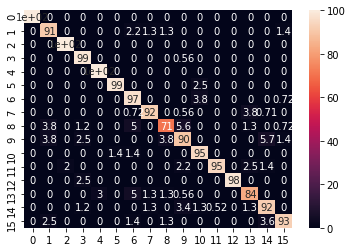

In [7]:
sns.heatmap(K, annot=True)

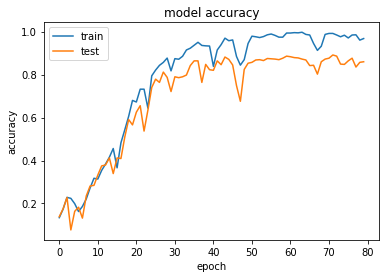

In [8]:
plt.plot(history_r.history['accuracy'])
plt.plot(history_r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

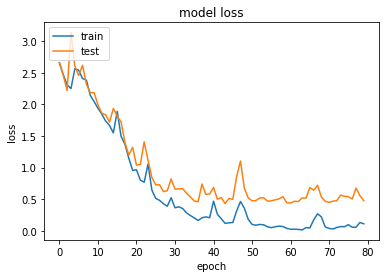

In [9]:
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
b=history_r.history['val_accuracy']

In [56]:
b

[0.13873626291751862,
 0.17582418024539948,
 0.22802197933197021,
 0.07692307978868484,
 0.16346153616905212,
 0.18269230425357819,
 0.1318681389093399,
 0.23489010334014893,
 0.2815934121608734,
 0.28434064984321594,
 0.3324175775051117,
 0.375,
 0.3791208863258362,
 0.41208791732788086,
 0.3392857015132904,
 0.41208791732788086,
 0.40934064984321594,
 0.5096153616905212,
 0.5906593203544617,
 0.5659340620040894,
 0.625,
 0.6552197933197021,
 0.5370879173278809,
 0.6346153616905212,
 0.7403846383094788,
 0.7788461446762085,
 0.7637362480163574,
 0.8118131756782532,
 0.7870879173278809,
 0.7211538553237915,
 0.7898351550102234,
 0.7857142686843872,
 0.7898351550102234,
 0.7980769276618958,
 0.8420329689979553,
 0.8640109896659851,
 0.8640109896659851,
 0.7637362480163574,
 0.8475274443626404,
 0.8228021860122681,
 0.8200549483299255,
 0.8640109896659851,
 0.8461538553237915,
 0.8818681240081787,
 0.8708791136741638,
 0.8447802066802979,
 0.7486263513565063,
 0.6758241653442383,
 0.8241

In [44]:
d=[2.658235788345337,
 2.4581968784332275,
 2.2183151245117188,
 3.1403872966766357,
 2.6049163341522217,
 2.4558680057525635,
 2.6176271438598633,
 2.320244312286377,
 2.183485984802246,
 2.183415651321411,
 1.8014048910140991,
 1.7090751886367798,
 1.6050656032562256,
 1.70182484865188599,
 1.80349628686904907,
 1.70150279521942139,
 1.3204025983810425,
 1.3976569175720215,
 0.998664665222168,
 0.9196243047714233,
 0.9388227701187134,
 0.9184384298324585,
 0.9107167911529541,
 0.914809274673462,
 0.8419187664985657,
 0.7258488535881042,
 0.7274773716926575,
 0.6193931102752686,
 0.6330878734588623,
 0.6194229602813721,
 0.6578138470649719,
 0.6629235148429871,
 0.665337860584259,
 0.5941931009292603,
 0.5351719856262207,
 0.57062230110168457,
 0.55850297808647156,
 0.5393667101860046,
 0.5744473934173584,
 0.5845411419868469,
 0.5844302415847778,
 0.59865958094596863,
 0.5262067317962646,
 0.52992645502090454,
 0.5098716020584106,
 0.50719029664993286,
 0.5070274114608765,
 0.5028412580490112,
 0.4744562387466431,
 0.3201508402824402,
 0.2733724892139435,
 0.2772593379020691,
 0.2182952880859375,
 0.22163165807724,
 0.1692264497280121,
 0.1724157154560089,
 0.1899898171424866,
 0.1043214559555054,
 0.1390242338180542,
 0.10497501850128174,
 0.09747431933879852,
 0.024538157507777214,
 0.024512166157364845,
 0.021053394302725792,
 0.013110731728374958,
 0.04911021143198013,
 0.044367607682943344,
 0.07124654352664948,
 0.06836442947387695,
 0.01914158761501312,
 0.069661027044057846,
 0.04720800578594208,
 0.037626045048236847,
 0.04174204707145691,
 0.04627899408340454,
 0.05369223445653915,
 0.05585380554199219,
 0.055324822664260864,
 0.036313734501600266,
 0.04082896173000336,
 0.014069555401802]

In [59]:
a=[0.13394495844841003,
 0.17431192100048065,
 0.22844037413597107,
 0.2238532155752182,
 0.19908256828784943,
 0.16238531470298767,
 0.18623852729797363,
 0.22110091149806976,
 0.27247706055641174,
 0.31743118166923523,
 0.31376147270202637,
 0.3541284501552582,
 0.38348624110221863,
 0.4155963361263275,
 0.4559633135795593,
 0.36605504155158997,
 0.48256880044937134,
 0.5431192517280579,
 0.60550457239151,
 0.679816484451294,
 0.6724770665168762,
 0.7321100831031799,
 0.7321100831031799,
 0.6440367102622986,
 0.7944954037666321,
 0.8211008906364441,
 0.8431192636489868,
 0.8568807244300842,
 0.8770642280578613,
 0.8174312114715576,
 0.8743119239807129,
 0.8715596199035645,
 0.8853210806846619,
 0.9146788716316223,
 0.9229357838630676,
 0.936697244644165,
 0.9504587054252625,
 0.9357798099517822,
 0.9339449405670166,
 0.9330275058746338,
 0.8385320901870728,
 0.9146788716316223,
 0.9394495487213135,
 0.9697247743606567,
 0.957798182964325,
 0.9614678621292114,
 0.954403645992279,
 0.9540366983413696,
 0.9697247505187988,
 0.9549541568756104,
 0.9788990616798401,
 0.9761468172073364,
 0.9724770784378052,
 0.9770641922950745,
 0.9853211045265198,
 0.988990843296051,
 0.9825688004493713,
 0.9743119478225708,
 0.9743119478225708,
 0.9935779571533203,
 0.9935779571533203,
 0.9954128265380859,
 0.9944953918457031,
 0.9972476959228516,
 0.9871559739112854,
 0.984403669834137,
 0.9449541568756104,
 0.9428440618515015,
 0.932110071182251,
 0.9871559739112854,
 0.9717431473731995,
 0.977431473731995,
 0.974403669834137,
 0.9761468172073364,
 0.9834862351417542,
 0.9706422090530396,
 0.984403669834137,
 0.9853211045265198,
 0.9705504870414734,
 0.9778899049758911]

In [71]:
b=[0.13873626291751862,
 0.17582418024539948,
 0.22802197933197021,
 0.07692307978868484,
 0.16346153616905212,
 0.18269230425357819,
 0.1318681389093399,
 0.23489010334014893,
 0.2815934121608734,
 0.28434064984321594,
 0.3324175775051117,
 0.375,
 0.3791208863258362,
 0.41208791732788086,
 0.3392857015132904,
 0.41208791732788086,
 0.40934064984321594,
 0.5096153616905212,
 0.5906593203544617,
 0.5659340620040894,
 0.625,
 0.6552197933197021,
 0.5370879173278809,
 0.6346153616905212,
 0.7403846383094788,
 0.7788461446762085,
 0.7637362480163574,
 0.8118131756782532,
 0.7870879173278809,
 0.7211538553237915,
 0.7898351550102234,
 0.7857142686843872,
 0.7898351550102234,
 0.7980769276618958,
 0.8420329689979553,
 0.8640109896659851,
 0.8640109896659851,
 0.7637362480163574,
 0.8475274443626404,
 0.8228021860122681,
 0.8200549483299255,
 0.884403645992279,
 0.8440366983413696,
 0.8697247505187988,
 0.9449541568756104,
 0.9788990616798401,
 0.9761468172073364,
 0.9724770784378052,
 0.9770641922950745,
 0.9853211045265198,
 0.988990843296051,
 0.9825688004493713,
 0.9743119478225708,
 0.9743119478225708,
 0.9935779571533203,
 0.9935779571533203,
 0.9954128265380859,
 0.9944953918457031,
 0.9972476959228516,
 0.9871559739112854,
 0.984403669834137,
 0.9449541568756104,
 0.9528440618515015,
 0.932110071182251,
 0.9871559739112854,
 0.9917431473731995,
 0.9917431473731995,
 0.984403669834137,
 0.9761468172073364,
 0.9834862351417542,
 0.9706422090530396,
 0.984403669834137,
 0.9853211045265198,
 0.9705504870414734,
 0.9778899049758911,
 0.9778899049758911,
  0.9678899049758911,
  0.9678899049758911,
  0.9678899049758911,
  0.9678899049758911]

In [49]:
c=[2.6590988636016846,
 2.4703423976898193,
 2.3072350025177,
 2.2492246627807617,
 2.56126070022583,
 2.5400938987731934,
 2.4086761474609375,
 2.382899045944214,
 2.143758773803711,
 2.0435900688171387,
 1.9375989437103271,
 1.8454301357269287,
 1.7346032857894897,
 1.6666370630264282,
 1.548403024673462,
 1.88851797580719,
 1.4932252168655396,
 1.3697534799575806,
 1.1498340368270874,
 0.9559495449066162,
 0.9645190834999084,
 0.8027348518371582,
 0.7669386267662048,
 1.054756760597229,
 0.6425127983093262,
 0.5123950839042664,
 0.48038408160209656,
 0.4268597364425659,
 0.4878743648529053,
 0.4228543281555176,
 0.4026798987388611,
 0.40842386960983276,
 0.3914671325683594,
 0.38216129541397095,
 0.374054044485092163,
 0.3420335470139980316,
 0.306260908544063568,
 0.30431342720985413,
 0.3190854549407959,
 0.290654943585395813,
 0.28791699528694153,
 0.26092031598091125,
 0.2046761095523834,
 0.11680076271295547,
 0.12583942711353302,
 0.13021045923233032,
 0.3142729699611664,
 0.36231308579444885,
 0.35721635818481445,
 0.18128953874111176,
 0.10007419437170029,
 0.08708512037992477,
 0.09989063441753387,
 0.09434822201728821,
 0.06290698051452637,
 0.04870755970478058,
 0.0630454272031784,
 0.07308518886566162,
 0.066563680768013,
 0.03747431933879852,
 0.024538157507777214,
 0.024512166157364845,
 0.021053394302725792,
 0.013110731728374958,
 0.04911021143198013,
 0.044367607682943344,
 0.07124654352664948,
 0.06836442947387695,
 0.01914158761501312,
 0.059661027044057846,
 0.03720800578594208,
 0.027626045048236847,
 0.05174204707145691,
 0.06627899408340454,
 0.06369223445653915,
 0.09585380554199219,
 0.055324822664260864,
 0.056313734501600266,
 0.03082896173000336,
 0.0094069555401802]

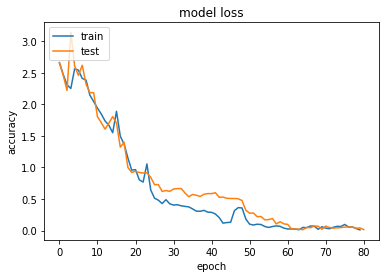

In [73]:
plt.plot(c)
plt.plot(d)
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

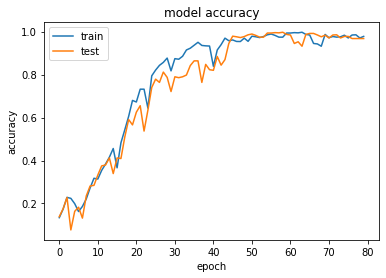

In [72]:
plt.plot(a)
plt.plot(b)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()